# Integrated Approach to Sentiment Analysis: Leveraging Classic ML

To continue with the sentiment analysis and enhance it with classic machine learning models, a neural network, and a language model, I need to follow a structured approach, starting from Step 1.

## **Classic ML**

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder

from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf

Step 1: Upload Data

This step involves uploading and loading the dataset (labeled_reddit_comments.csv) containing Reddit comments and their associated sentiment labels. It ensures the data is correctly read into a pandas DataFrame (df) for further processing.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('drive/MyDrive/labeled_reddit_comments.csv')

In [4]:
df.head()

,Title,Comment,cleaned_comment,Cluster,Label,svd-one,svd-two
0,Pulsechain is dead!!,"Prove yourself right.\n\n48,000+ validators\n\...",prove right validators active unique wallets h...,1,negative,0.098955,-0.046532
1,Pulsechain is dead!!,"Idk what you're talking about, eco is thriving",idk youre talking eco thriving,1,negative,0.043390,-0.012265
2,Pulsechain is dead!!,Didnt people say the same for HEX ? Its not a ...,didnt people say hex bull market right hold ra...,0,positive,0.250525,0.064132
3,Pulsechain is dead!!,Low quality post. It is in the top 20 chains i...,low quality post top chains tvl h vol atm,1,negative,0.021697,-0.004734
4,Pulsechain is dead!!,"No. Please, sell. You're not worth our time.",please sell youre worth time,1,negative,0.110602,-0.050581


Process Data

In [5]:
# Check for NaN values in 'cleaned_comment' column
nan_rows = df[df['cleaned_comment'].isnull()]
print(f"Number of NaN rows in 'cleaned_comment': {len(nan_rows)}")

# Drop rows with NaN values in 'cleaned_comment' column (if any)
df = df.dropna(subset=['cleaned_comment'])

Number of NaN rows in 'cleaned_comment': 3


Step 3: Feature Extraction using CountVectorizer

Use CountVectorizer to convert text data into numerical features.

In [6]:
# Convert text data into numerical feature vectors suitable for machine learning models.
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_comment'])
y = df['Label']  # Assuming 'Label' column contains the target variable

Step 3: Train and Evaluate Classic ML Models

This step involves training and evaluating three classic machine learning models (Logistic Regression, Random Forest, SVM) on the preprocessed data (X and y). It includes generating confusion matrices and ROC curves to assess the models' performance in classifying sentiment (Negative, Neutral, Positive).

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming df['cleaned_comment'] and df['label'] are defined
X = df['cleaned_comment']
y = df['Cluster']  # Make sure you have a label column in your DataFrame

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the comments using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_vectorized, y_train)
nb_predictions = nb_model.predict(X_test_vectorized)

nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naive Bayes Accuracy:", nb_accuracy)

print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

# Gradient Boosting Classifier model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_vectorized, y_train)
gb_predictions = gb_model.predict(X_test_vectorized)

gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Gradient Boosting Classifier Accuracy:", gb_accuracy)

print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

# Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_vectorized, y_train)
rf_predictions = rf_model.predict(X_test_vectorized)

rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Naive Bayes Accuracy: 0.9132636910414689
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Gradient Boosting Classifier Accuracy: 0.9763939763939764
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Random Forest Accuracy: 0.969429747207525


Plotting Confusion Matrices

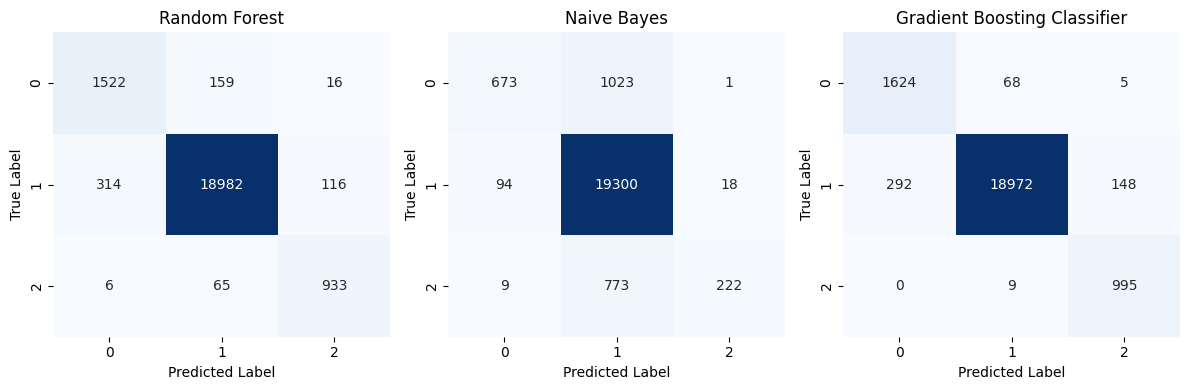

In [9]:
# Confusion Matrices
# Naive Bayes Confusion Matrix
nb_cm = confusion_matrix(y_test, nb_predictions)
# Gradient Boosting Confusion Matrix
gb_cm = confusion_matrix(y_test, gb_predictions)
# Random Forest Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_predictions)

# Plot Confusion Matrices
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 3, 2)
sns.heatmap(nb_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 3, 3)
sns.heatmap(gb_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Gradient Boosting Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()

Plotting ROC Curves

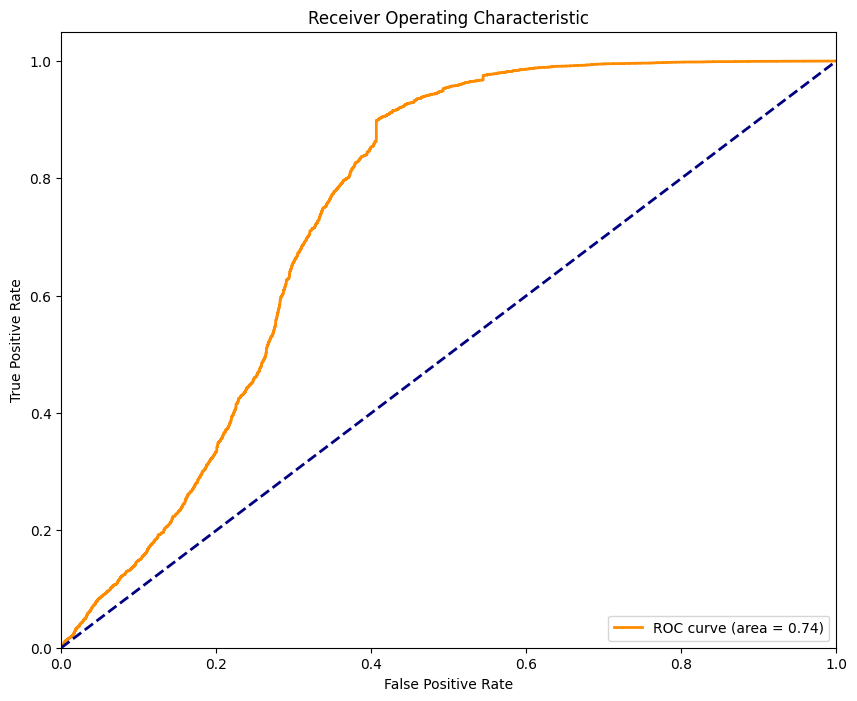

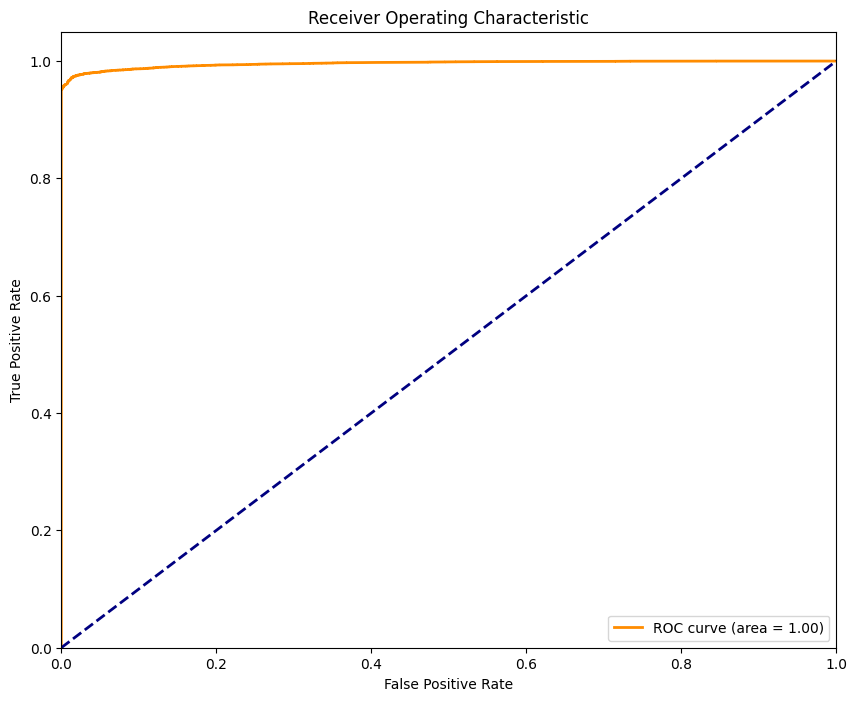

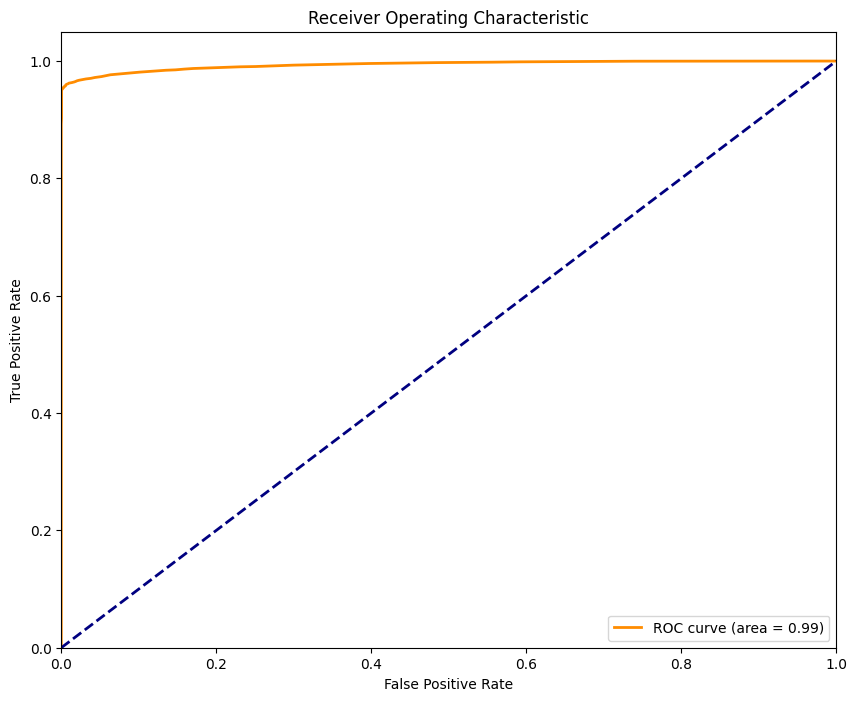

In [10]:
# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, label=None):
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Naive Bayes ROC Curve
nb_probs = nb_model.predict_proba(X_test_vectorized)[:, 1]
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs, pos_label=nb_model.classes_[1])
nb_roc_auc = auc(nb_fpr, nb_tpr)
plot_roc_curve(nb_fpr, nb_tpr, nb_roc_auc, label='Naive Bayes')

# Gradient Boosting ROC Curve
gb_probs = gb_model.predict_proba(X_test_vectorized)[:, 1]
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs, pos_label=gb_model.classes_[1])
gb_roc_auc = auc(gb_fpr, gb_tpr)
plot_roc_curve(gb_fpr, gb_tpr, gb_roc_auc, label='Gradient Boosting')

# Random Forest ROC Curve
rf_probs = rf_model.predict_proba(X_test_vectorized)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs, pos_label=rf_model.classes_[1])
rf_roc_auc = auc(rf_fpr, rf_tpr)
plot_roc_curve(rf_fpr, rf_tpr, rf_roc_auc, label='Random Forest')
